In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy.signal as sg 
from scipy.fft import fft, fftfreq, fftshift

audio = r'DEAM\audios\10.wav' 
fs, señal = wav.read(audio) 

if señal.ndim > 1:
    señal = np.mean(señal, axis=1) 

print(f'Frecuencia de muestreo: {fs} Hz')
print(f'Duración: {len(señal) / fs} segundos')
print(f'Forma de la señal: {señal.shape}')

Frecuencia de muestreo: 44100 Hz
Duración: 45.08734693877551 segundos
Forma de la señal: (1988352,)


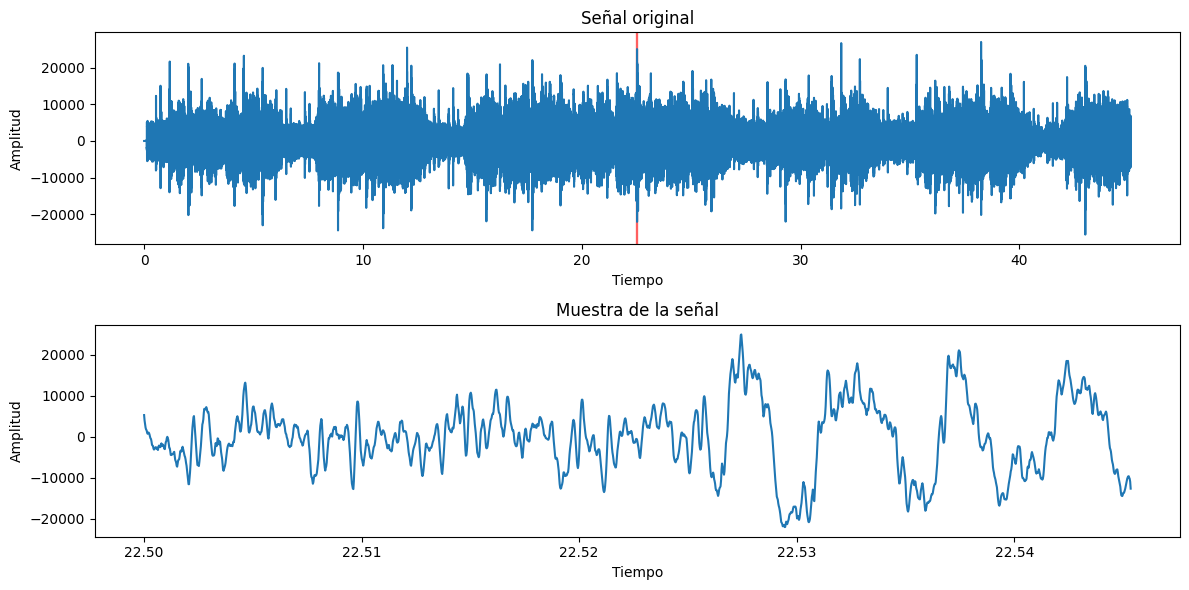

In [4]:
t = np.arange(len(señal)) / fs #eje x

N = 2000 # numero de muestras
t_start = 22.5 
t_end = t_start + N/fs 
ventana = (t >= t_start) & (t <= t_end) 


muestra, t_muestra = sg.resample(señal[ventana], N, t[ventana]) 


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, señal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal original')
plt.axvspan(t_start, t_end, alpha=0.5, color='red') 

plt.subplot(2, 1, 2)
plt.plot(t_muestra, muestra)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Muestra de la señal')

plt.tight_layout()
plt.show()

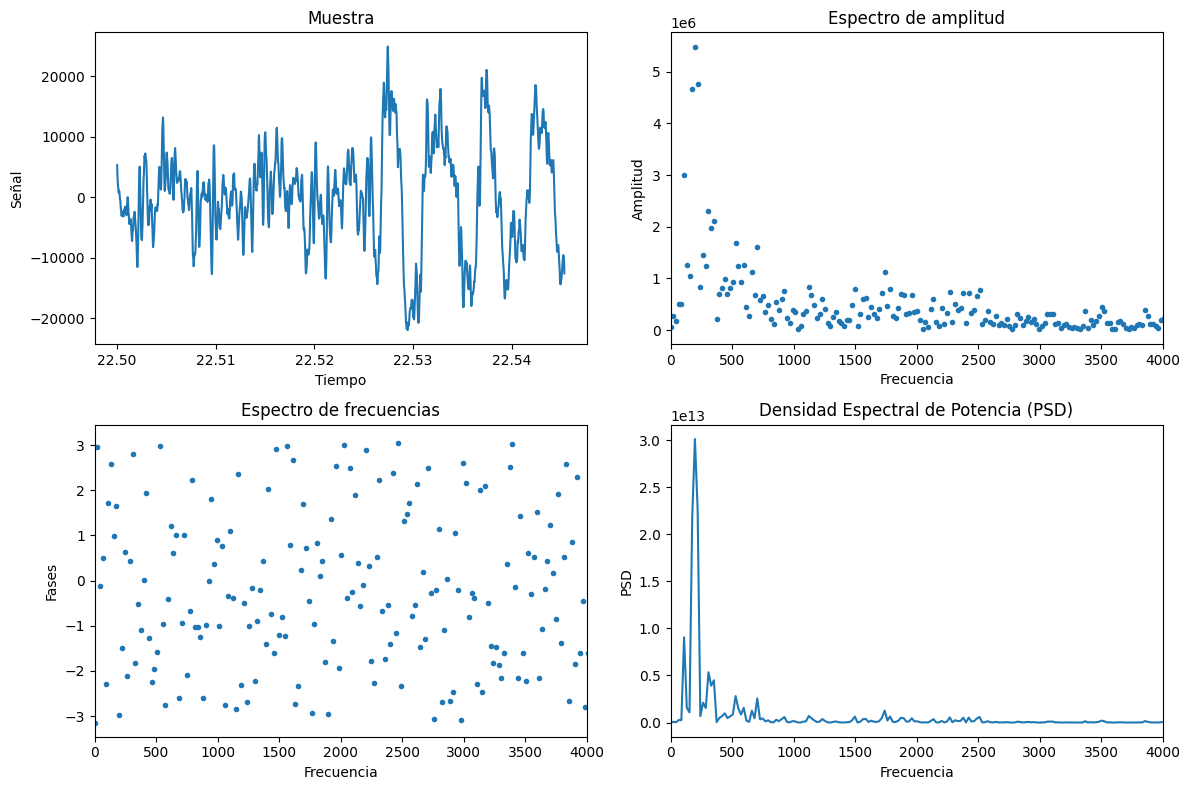

In [15]:
T = t_muestra[1] - t_muestra[0]  # Sampling interval
y = muestra # Signal array



yf = fft(y) 
xf = fftfreq(N, T) # f correspondientes a las componentes de la señal transformada 
xf = fftshift(xf) # para centrar las frecuencias positivas y negativas 
yf = fftshift(yf)

amp = np.abs(yf) # Amplitud 
phs = np.angle(yf) #fases

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(t_muestra, muestra)
plt.xlabel('Tiempo')
plt.ylabel('Señal')
plt.title('Muestra')

plt.subplot(2, 2, 2)
plt.plot(xf, amp, '.')
plt.xlim(0,4000)
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.title('Espectro de amplitud')

plt.subplot(2, 2, 3)
plt.plot(xf, phs, '.')
plt.xlim(0,4000)
plt.xlabel('Frecuencia')
plt.ylabel('Fases')
plt.title('Espectro de frecuencias')

plt.subplot(2, 2, 4)
plt.plot(xf, (np.abs(yf))**2 )
plt.xlim(0,4000)
plt.xlabel('Frecuencia')
plt.ylabel('PSD')
plt.title('Densidad Espectral de Potencia (PSD)')


plt.tight_layout()
plt.show()

[1.         0.99210098 0.97215336 0.94369523 0.90941371 0.87219635
 0.83492091 0.80031108 0.77032693 0.7451164  0.72449696]


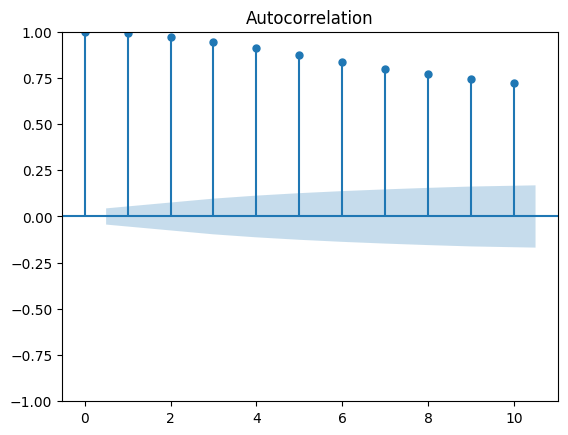

In [14]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Definir los datos de la serie de tiempo
x = [22, 24, 25, 25, 28, 29, 34, 37, 40, 44, 51, 48, 47, 50, 51]

def autocorr(y):
    # Calcular la autocorrelación para cada retraso en la serie de tiempo
    acf_result = sm.tsa.acf(y, nlags=10)

    # Imprimir el resultado de la autocorrelación
    print(acf_result)

    # Graficar la función de autocorrelación
    plot_acf(y, lags=10)
    plt.show()

In [11]:
pip install statsmodels 


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.8 MB 1.1 MB/s eta 0:00:09
    --------------------------------------- 0.2/9.8 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.8 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.5/9.8 MB 2.4 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.8 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.8 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/9.8 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/9.8 MB 3.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/9.8 MB 3.1 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.8 MB 3.2 MB/s eta 0:00:03
   ------- -------------------------------- 1.7/9.8 MB 3.2 MB/s eta 0:00:03
   ------- -------